# Steps Involved
- read and visualize the data
- clean the data
- preparation for modelling
- data modelling
- Final analysis and recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step1 Read and visualize the data

In [2]:
retail_df=pd.read_csv(r"C:\Users\acer\Desktop\UPGRAD\machine learning\Clustering\Online_retail_store\Online+Retail.csv",sep=",",encoding='ISO-8859-1',header=0)

In [3]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

# Step2 Clean the Data

In [4]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
retail_df=retail_df.dropna()

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Step 3 Prepare The Data For Modelling
- R(Recency): Number of days since last purchase
- F(Frequency): Number of transactions
- M(Monetary): Total amount of purchasing

In [7]:
# monetary
retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']

In [8]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  amount  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom   15.30  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom   22.00  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34

In [9]:
grouped_df=retail_df.groupby('CustomerID')['amount'].sum()

In [10]:
grouped_df=grouped_df.reset_index()

In [11]:
grouped_df.head()

CustomerID   amount
0     12346.0     0.00
1     12347.0  4310.00
2     12348.0  1797.24
3     12349.0  1757.55
4     12350.0   334.40

In [12]:
# frequency
freq=retail_df.groupby('CustomerID')['InvoiceNo'].count()
freq=freq.reset_index()

In [13]:
freq.columns=['CustomerID','frequency']

In [14]:
freq.head()

CustomerID  frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [15]:
grouped_df=pd.merge(grouped_df,freq,on='CustomerID',how='inner')

In [16]:
grouped_df.head()

CustomerID   amount  frequency
0     12346.0     0.00          2
1     12347.0  4310.00        182
2     12348.0  1797.24         31
3     12349.0  1757.55         73
4     12350.0   334.40         17

In [17]:
#recency
#convert invoice date to date time format
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [18]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [19]:
# compute the max date
max_date=max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [20]:
# compute the diff
retail_df['diff']=max_date-retail_df['InvoiceDate']
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   

               diff  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [21]:
recency=retail_df.groupby('CustomerID')['diff'].min()
recency=recency.reset_index()
recency.head()

CustomerID              diff
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00

In [22]:
#merge
grouped_df=pd.merge(grouped_df,recency,on='CustomerID',how='inner')
grouped_df.columns=['CustomerID','amount','frequency','recency']
grouped_df.head()

CustomerID   amount  frequency           recency
0     12346.0     0.00          2 325 days 02:33:00
1     12347.0  4310.00        182   1 days 20:58:00
2     12348.0  1797.24         31  74 days 23:37:00
3     12349.0  1757.55         73  18 days 02:59:00
4     12350.0   334.40         17 309 days 20:49:00

In [23]:
grouped_df['recency']=grouped_df['recency'].dt.days
grouped_df.head()

CustomerID   amount  frequency  recency
0     12346.0     0.00          2      325
1     12347.0  4310.00        182        1
2     12348.0  1797.24         31       74
3     12349.0  1757.55         73       18
4     12350.0   334.40         17      309

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5801f8550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5801f8af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5801f8280>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5801c30d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5801c33a0>],
 'means': []}

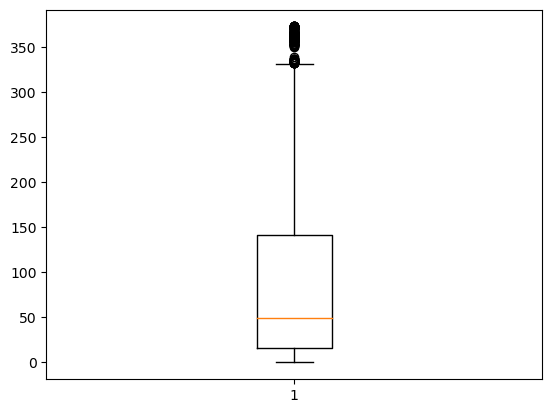

In [24]:
# 1. outlier treatment
plt.boxplot(grouped_df.recency)

Two types of outliers:
- statistical, value more than 95 percentile
- domain specific, unexpected values in columns

For Now outliers are not being removed so as to group it in a cluster

In [25]:
# removing statistical outliers
Q1= grouped_df.amount.quantile(0.05)
Q3= grouped_df.amount.quantile(0.95)
IQR= Q3-Q1
grouped_df=grouped_df[(grouped_df.amount>=Q1 - 1.5*IQR)&(grouped_df.amount<=Q3+1.5*IQR)]

Q1= grouped_df.frequency.quantile(0.05)
Q3= grouped_df.frequency.quantile(0.95)
IQR= Q3-Q1
grouped_df=grouped_df[(grouped_df.frequency>=Q1 - 1.5*IQR)&(grouped_df.frequency<=Q3+1.5*IQR)]

Q1= grouped_df.recency.quantile(0.05)
Q3= grouped_df.recency.quantile(0.95)
IQR= Q3-Q1
grouped_df=grouped_df[(grouped_df.recency>=Q1-1.5*IQR)&(grouped_df.recency<=Q3+1.5*IQR)]

In [26]:
# 2. rescaling
rfm_df=grouped_df[['amount','frequency','recency']]

# instantiate
scaler=StandardScaler()

#fit_transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [27]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['amount','frequency','recency']

# Step4: Modelling

In [28]:
#k-means with some arbitrary k
Kmeans= KMeans(n_clusters=4, max_iter=50)
Kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

# Finding optimal no of clusters

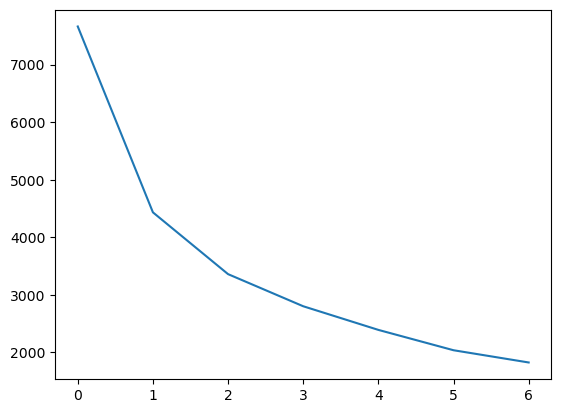

In [29]:
# elbow curve/SSD
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for n_c in range_n_clusters:
    Kmeans= KMeans(n_clusters=n_c, max_iter=50)
    Kmeans.fit(rfm_df_scaled)
    
    ssd.append(Kmeans.inertia_)
    
#plot the ssds for n clusters
plt.plot(ssd)

In [30]:
# silhoutte analysis
range_n_clusters=[2,3,4,5,6,7,8]
for c in range_n_clusters:
    Kmeans= KMeans(n_clusters=c, max_iter=50)
    Kmeans.fit(rfm_df_scaled)
    c_labels=Kmeans.labels_
    # silhouette score
    sil_avg=silhouette_score(rfm_df_scaled,c_labels)
    print('for n clusters={0}, the silhouette score is {1}'.format(c,sil_avg))

for n clusters=2, the silhouette score is 0.5415858652525395
for n clusters=3, the silhouette score is 0.5084896296141937
for n clusters=4, the silhouette score is 0.47782241003860476
for n clusters=5, the silhouette score is 0.46613075550600325
for n clusters=6, the silhouette score is 0.4171700614092766
for n clusters=7, the silhouette score is 0.4155864933142358
for n clusters=8, the silhouette score is 0.40088653447686684


In [31]:
# final model K=3
Kmeans= KMeans(n_clusters=3, max_iter=50)
Kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [32]:
# assign the labels
grouped_df['cluster_id']=Kmeans.labels_
grouped_df.head()

CustomerID   amount  frequency  recency  cluster_id
0     12346.0     0.00          2      325           0
1     12347.0  4310.00        182        1           2
2     12348.0  1797.24         31       74           1
3     12349.0  1757.55         73       18           1
4     12350.0   334.40         17      309           0

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

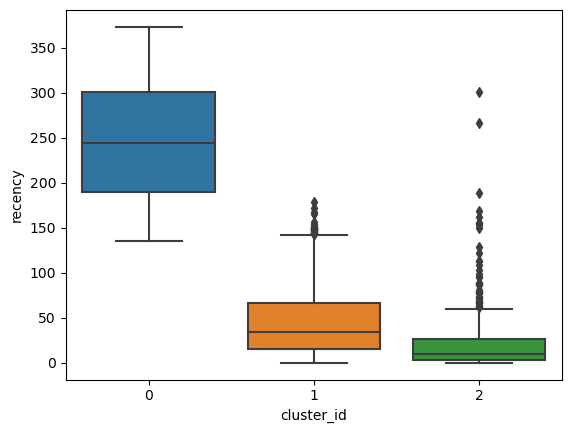

In [39]:
# plot
sns.boxplot(x='cluster_id',y='recency',data=grouped_df)